 **simple and easy Linear reg with Pytorch, Gradient Descent and GPU** 

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



In [0]:
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from IPython.core.debugger import set_trace

The problems 

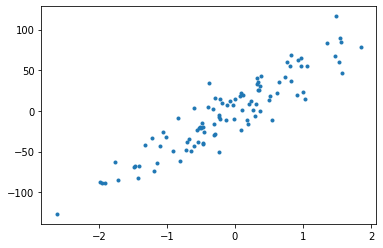

In [28]:

from sklearn.datasets import make_regression


n_features = 1
n_samples = 100

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=20,
    random_state=42,
)

fix, ax = plt.subplots()
ax.plot(X, y, ".")

we have, tensor, numpy automatic diff. and Gradient 

Numpy to tensor converting and === the Solution =====

In [0]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

neural network and optimization 

In [0]:

class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.beta(X)



In [0]:
model = LinReg(n_features).to(DEVICE)  # <-- here
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


X, y = X.to(DEVICE), y.to(DEVICE)  # <-- here


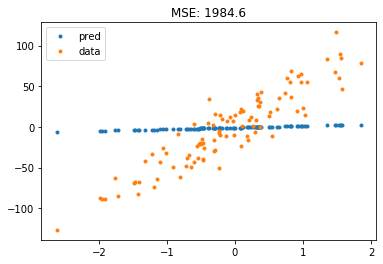

In [78]:
# Train step
model.train()  # <-- here
optimizer.zero_grad()

y_ = model(X)
loss = loss_fn(y_, y)

loss.backward()
optimizer.step()

# Eval
model.eval()  # <-- here
with torch.no_grad():
    y_ = model(X)    

# Vis
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();


**Exercise:**
1. Write a proper training loop for this linear regression example.
2. Split data into train and valid.
3. Use the Dataset and DataLoader abstraction.
4. Create a logistic regression module.
5. Create a Multi Layer Perceptron (MLP).